In [1]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/home/sathwik/Storage/100DaysOfCode/DATASETS/Linear Regression/Boston.csv')
data=data.drop(['Unnamed: 0'],axis=1)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#seperating the output and inputs from the datset

y=data['medv']
x=data.drop('medv',axis=1)

print(x.shape)
print(y.shape)

(506, 13)
(506,)


In [17]:
y=data['medv']
x=data.drop('medv',axis=1)
#normalizing the datasets
u = np.mean(x,axis=0)
# print(u)
std = np.std(x,axis=0)
print(std)
x = (x-u)/std
x.head()

crim         3.613524
zn          11.363636
indus       11.136779
chas         0.069170
nox          0.554695
rm           6.284634
age         68.574901
dis          3.795043
rad          9.549407
tax        408.237154
ptratio     18.455534
black      356.674032
lstat       12.653063
dtype: float64


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


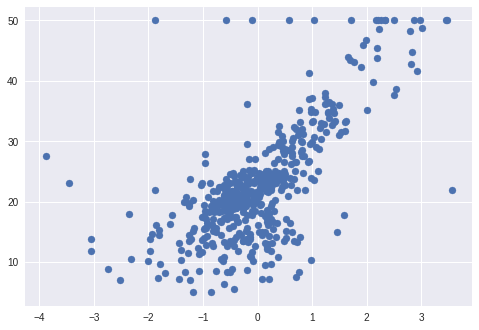

In [5]:
plt.style.use('seaborn')
plt.scatter(x.iloc[:,5],y)
plt.show()

In [6]:
ones = np.ones((x.shape[0],1))
x = np.hstack((ones,x))
print(x.shape)

(506, 14)


In [7]:
x[4]

array([ 1.        , -0.41248185, -0.48772236, -1.30687771, -0.27259857,
       -0.83528384,  1.22857665, -0.51117971,  1.07773662, -0.75292215,
       -1.10611514,  0.1130321 ,  0.44105193, -1.02650148])

In [8]:

#unoptimised normal linear regression
class LinearRegession:
    def hypothesis(x,theta):
        y_=0.0
        n=x.shape[0]
        # print(x)
        for i in range(n):
            y_+=(theta[i]*x[i])
        return y_
    def error(X,y,theta):#rms error
        e=0.0
        m = X.shape[0]
        # print(m)
        for i in range(m):
            y_ = LinearRegession.hypothesis(X[i],theta)
            e  += (y[i]-y_)**2
        return e/m
    def gradient(X,y,theta):
        m,n = X.shape
        grad = np.zeros((n,))
        for j in range(n):
            for i in range(m):
                # print(X)
                y_ = LinearRegession.hypothesis(X[i],theta)
                grad[j] += (y_ -y[i])*X[i][j]
        return grad/m



    def gradient_descent(X,y,learning_rate=0.1,max_epochs=300):
        m,n = X.shape
        theta = np.zeros((n,))
       
        error_list = []
        for i in range(max_epochs):
            print(i)
            e = LinearRegession.error(X,y,theta)
            error_list.append(e)
            grad = LinearRegession.gradient(X,y,theta)
            for j in range(n):
                theta[j] = theta[j] - learning_rate*grad[j]
            
            print(e)
            print(theta)
        return theta,error_list

In [13]:


import time
start = time.time()
theta,error_list = LinearRegession.gradient_descent(x,y,0.1,100)
end = time.time()
print("Time taken is ", end-start)



0
592.1469169960473
[ 2.25328063 -0.35677472  0.3311776  -0.44444724  0.16102925 -0.39262282
  0.63889752 -0.34634629  0.22963481 -0.35063862 -0.43049136 -0.46655499
  0.30638419 -0.67776536]
1
462.46044906845844
[ 4.2812332  -0.4975652   0.44772527 -0.59804408  0.29858792 -0.50837471
  1.06993195 -0.43890551  0.20785717 -0.43482752 -0.57559333 -0.73270061
  0.43896555 -1.06620647]
2
375.38527509572685
[ 6.10639051 -0.55392292  0.48294688 -0.6411974   0.41422126 -0.52414809
  1.39758727 -0.43952498  0.09970847 -0.41919576 -0.61199239 -0.90912104
  0.50375782 -1.32995351]
3
307.6933342962929
[ 7.74903209 -0.57700397  0.4882222  -0.64347834  0.51048473 -0.50742812
  1.66509979 -0.40996556 -0.03226878 -0.36805005 -0.60804532 -1.04041298
  0.54181962 -1.53418104]
4
253.39168634679328
[ 9.22740952 -0.58678436  0.48324102 -0.6315729   0.59004078 -0.48346658
  1.89164491 -0.37335546 -0.16504683 -0.30607399 -0.59014293 -1.14533429
  0.56905005 -1.70537675]
5
209.5598827590642
[10.5579492  -0.5

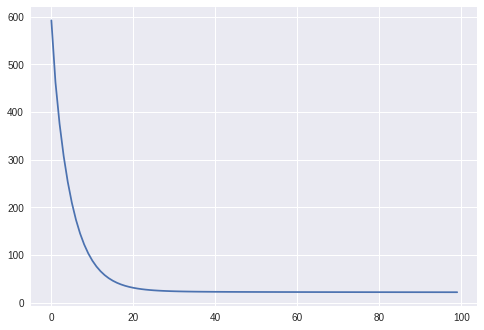

In [14]:


plt.plot(error_list)
plt.show()



In [15]:
y_ = []
m = x.shape[0]
for i in range(m):
    pred = LinearRegession.hypothesis(x[i],theta)
    y_.append(pred)
y_ = np.array(y_)
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100
r2_score(y,y_)


73.74793148398027